# Handling Test Data

In this file, I will be applying the same feature engineering methods on test data as done on the training dataset in the main notebook file called "House Prices Advanced Regression Techniques"

In [166]:
## Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Missing Values

In [167]:
test_df = pd.read_csv('Data/test.csv')

In [168]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [169]:
test_df.shape

(1459, 80)

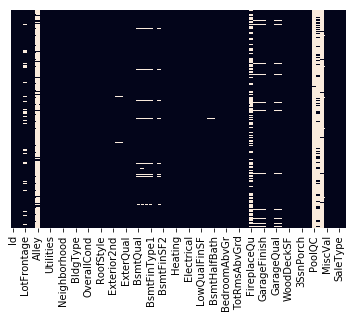

In [170]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)

In [171]:
# Remove columns with over 80% missing values

remove_col = [feature for feature in test_df.columns if test_df[feature].isnull().sum() / len(test_df[feature]) > 0.8]
print(remove_col)

for feature in remove_col:
    test_df.drop([feature], axis=1, inplace=True)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [172]:
test_df.shape

(1459, 76)

In [173]:
cat_feature_na = [feature for feature in test_df.columns if test_df[feature].isnull().sum() >=1 and test_df[feature].dtypes == "O"]

In [174]:
## Replace missing values in categorical features with a new label
def replace_cat_feature(data, cat_feature_na):
    data_copy = data.copy()
    data_copy[cat_feature_na] = data_copy[cat_feature_na].fillna("Missing")
    return data_copy

test_df = replace_cat_feature(test_df, cat_feature_na)

In [175]:
test_df[cat_feature_na].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [176]:
## Check for numerical variables that contain missing values
num_feature_na = [feature for feature in test_df.columns if test_df[feature].isnull().sum() >= 1 and test_df[feature].dtypes != "O"]

## Print the numerical variables and percentage of missing values
for feature in num_feature_na:
    print("{}: {}% Missing Values".format(feature, np.round(test_df[feature].isnull().mean(), 4)))

LotFrontage: 0.1556% Missing Values
MasVnrArea: 0.0103% Missing Values
BsmtFinSF1: 0.0007% Missing Values
BsmtFinSF2: 0.0007% Missing Values
BsmtUnfSF: 0.0007% Missing Values
TotalBsmtSF: 0.0007% Missing Values
BsmtFullBath: 0.0014% Missing Values
BsmtHalfBath: 0.0014% Missing Values
GarageYrBlt: 0.0535% Missing Values
GarageCars: 0.0007% Missing Values
GarageArea: 0.0007% Missing Values


In [177]:
## Replacing the numerical Missing Values
## Create a new column that stores null values as 1 and others as 0
## Then replace the missing values original column with median value

for feature in num_feature_na:
    ## Replace by using median since there are outliers
    median_value = test_df[feature].median()
    
    ## Create a new feature to capture nan values
    #test_df[feature+'nan'] = np.where(test_df[feature].isnull(), 1, 0)
    test_df[feature].fillna(median_value, inplace=True)

test_df[num_feature_na].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [178]:
## Temporal Variables (Datetime Variables)
# Convert temporal features to the difference between year sold 
# and the feature

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test_df[feature] = test_df['YrSold'] - test_df[feature]

In [179]:
test_df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


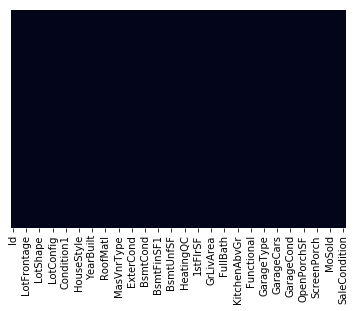

In [180]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)

## Numerical Variables

In [181]:
## Apply log normal transformation to non-zero variables that are
## skewed or does not follow Gaussian distribution

num_skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_skew_features:
    test_df[feature] = np.log(test_df[feature])

In [182]:
test_df[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,4.382027,9.360655,6.797940,6.797940
1,4.394449,9.565704,7.192182,7.192182
2,4.304065,9.534595,6.833032,7.395722
3,4.356709,9.208138,6.830874,7.380256
4,3.761200,8.518193,7.154615,7.154615


/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Applications/anaconda3/lib/pyth

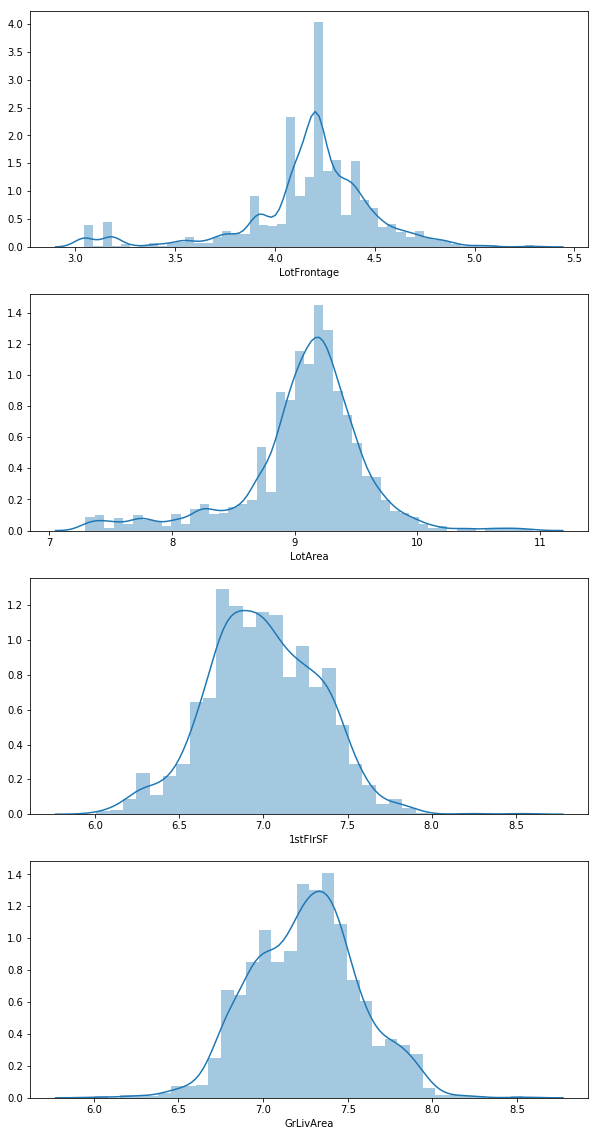

In [183]:
fig, ax = plt.subplots(4,1, figsize=(10,20))
sns.distplot(test_df['LotFrontage'], ax=ax[0])
sns.distplot(test_df['LotArea'], ax=ax[1])
sns.distplot(test_df['1stFlrSF'], ax=ax[2])
sns.distplot(test_df['GrLivArea'], ax=ax[3])
fig.show()

## Handling Rare Categorical Variables

In [184]:
cat_feature = [feature for feature in test_df.columns if test_df[feature].dtypes == 'O']

In [185]:
cat_feature

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [186]:
## Replace categories that represent less than 1% of the obeservtions
## in the respective catergorical variable with the string 'Rare_var'

for feature in cat_feature:
    percent = test_df.groupby(feature)['MSZoning'].count()/len(test_df)
    percent_df = percent[percent > 0.01].index
    test_df[feature] = np.where(test_df[feature].isin(percent_df), test_df[feature], 'Rare_var')

In [187]:
len(test_df.columns)

76

In [188]:
test_df.to_csv('Data/cleantest.csv',index=False)